## modelling_NLP

In [1]:
## Loading packages required 
import pandas as pd
import numpy as np


## for graphs
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import export_graphviz
import graphviz
from wordcloud import WordCloud


# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.


# Machine learning methods 
from sklearn.preprocessing import LabelEncoder # for variable type conversion
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score, validation_curve, train_test_split
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.metrics import confusion_matrix

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression as LR
from sklearn.naive_bayes import MultinomialNB

#misc
import warnings
import re
import string
import pickle

# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import seaborn as sns




In [2]:
df = pd.read_csv("final_data.csv")
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,date,source,tweet,Label
0,My Budget Adviser 🇺🇲,United States,Veteran |Husband |Dad |Author |Wells Fargo VP ...,8/15/2017 15:36,88,283,2834,1/15/2021,Twitter for Android,#BreakingNews #BREAKING \n\nThe #IRS delays st...,0.0
1,Sema Sgaier,"Washington, DC","Working through pandemics: #COVID19, #HIV, #TB...",11/23/2011 7:24,872,560,1832,1/15/2021,Twitter Web App,New findings fr @SurgoVentures survey of U.S....,0.0
2,Jessie Vargas Loera,"Texas, USA",A lefty in the right state of mind,4/12/2011 18:49,188,618,12715,1/15/2021,Twitter for iPhone,Help spread the word! #COVID19 #CovidVaccine #...,0.0
3,The IZ Partnership,"Houston, TX",We are unapologetic advocates of immunization....,11/16/2008 21:16,2148,2212,569,1/15/2021,Twitter Web App,TIP president and CEO Allison Winnike on #Covi...,0.0
4,Dr. Kirsten Brown,"Washington, DC",Associate Professor & Vice Chair for Education...,3/12/2010 14:03,1691,1203,13349,1/15/2021,Twitter for Android,"#HappyFriday from my 76 year-old mother, Kay B...",0.0


In [3]:
df.shape

(3999, 11)

In [4]:
## Let us reveiw the data 
# listing Datatypes  
df.dtypes

user_name            object
user_location        object
user_description     object
user_created         object
user_followers        int64
user_friends          int64
user_favourites       int64
date                 object
source               object
tweet                object
Label               float64
dtype: object

In [5]:
# check the number of positive vs. negative tagged sentences
efficiency_tweets = df['Label'][df.Label == 1 ]
other_tweets = df['Label'][df.Label == 0 ]

print('Total length of the data is:         {}'.format(df.shape[0]))
print('No. of efficiency related tweets is:  {}'.format(len(efficiency_tweets)))
print('No. of other tweets is: {}'.format(len(other_tweets)))

Total length of the data is:         3999
No. of efficiency related tweets is:  149
No. of other tweets is: 3850


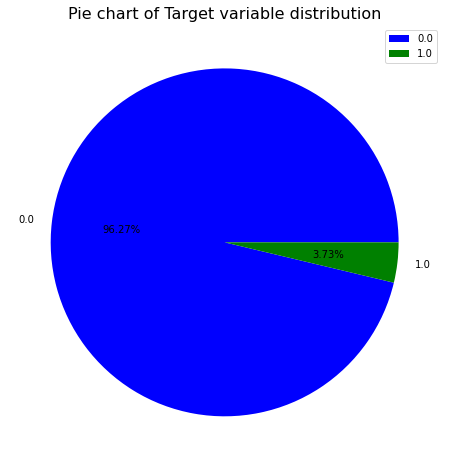

In [6]:
fig = plt.figure(figsize=(8,8))
targets = df.groupby('Label').size()
targets.plot(kind='pie', subplots=True, figsize=(10, 8), autopct = "%.2f%%", colors=['Blue','green'])
plt.title("Pie chart of Target variable distribution",fontsize=16)
plt.ylabel("")
plt.legend()
plt.savefig("Pichart_target.png")
plt.show()





## Length of tweet content

In [7]:
df['length'] = df.tweet.str.split().apply(len)

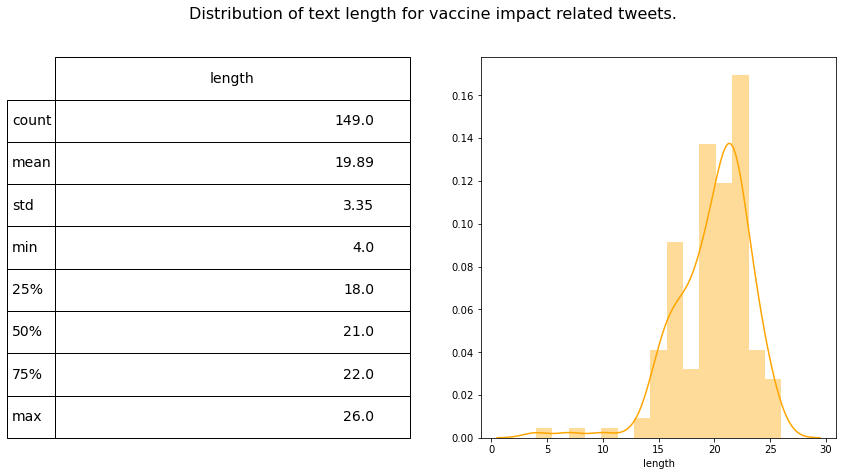

In [8]:
fig = plt.figure(figsize=(14,7))

ax1 = fig.add_subplot(122)
sns.distplot(df[df['Label']==1]['length'], ax=ax1,color='Orange')
describe = df.length[df.Label==1].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for vaccine impact related tweets.', fontsize=16)
plt.savefig("text length_impact.png")
plt.show()

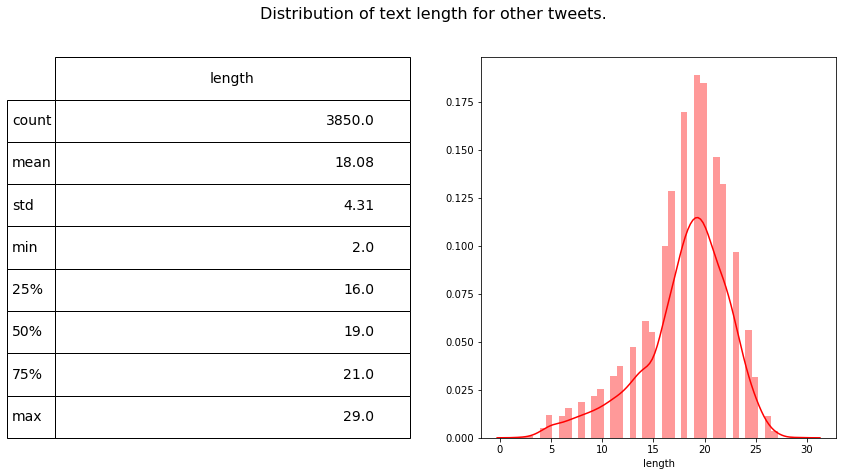

In [9]:
fig = plt.figure(figsize=(14,7))

ax1 = fig.add_subplot(122)
sns.distplot(df[df['Label']==0]['length'], ax=ax1,color='red')
describe = df.length[df.Label==0].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for other tweets.', fontsize=16)
plt.savefig("text lenght no impacts.png")
plt.show()

### Most common user

C:\Users\VIOLIN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 55356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\VIOLIN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 57331 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\VIOLIN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 57096 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\VIOLIN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 55357 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\VIOLIN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 56620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\VIOLIN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 55356 missing 

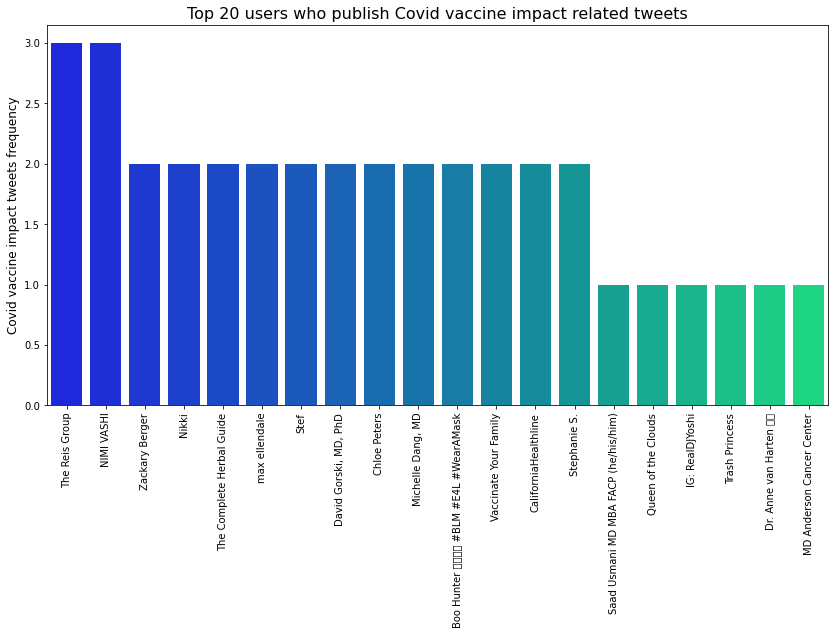

In [10]:
plt.figure(figsize=(14,7))
common_keyword=sns.barplot(x=df[df['Label']==1]['user_name'].value_counts()[:20].index, \
                           y=df[df['Label']==1]['user_name'].value_counts()[:20],palette='winter')
common_keyword.set_xticklabels(common_keyword.get_xticklabels(),rotation=90)
common_keyword.set_ylabel('Covid vaccine impact tweets frequency',fontsize=12)
plt.title('Top 20 users who publish Covid vaccine impact related tweets',fontsize=16)
plt.savefig("text lenght-impact.png")
plt.show()

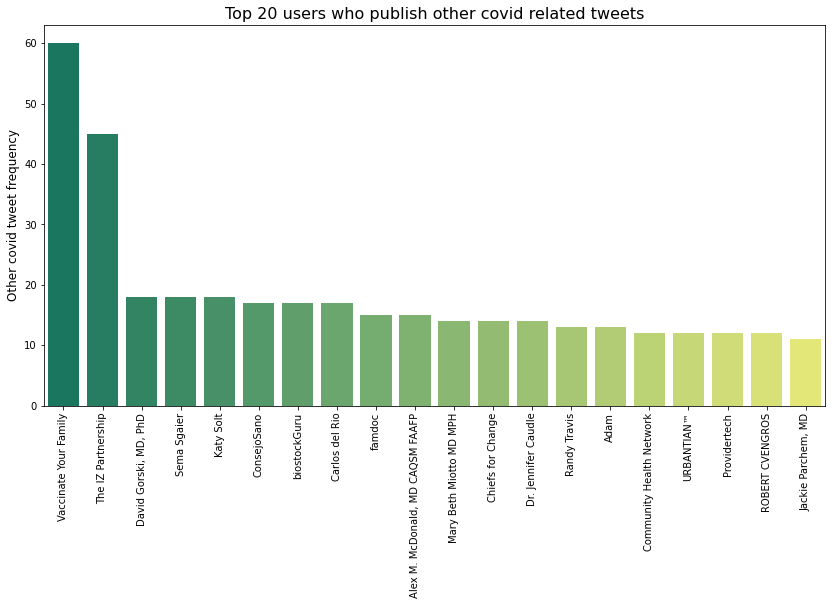

In [11]:
plt.figure(figsize=(14,7))
common_keyword=sns.barplot(x=df[df['Label']==0]['user_name'].value_counts()[:20].index, \
                           y=df[df['Label']==0]['user_name'].value_counts()[:20],palette='summer')
common_keyword.set_xticklabels(common_keyword.get_xticklabels(),rotation=90)
common_keyword.set_ylabel('Other covid tweet frequency',fontsize=12)
plt.title('Top 20 users who publish other covid related tweets',fontsize=16)
plt.savefig("text lenght-no impact.png")
plt.show()

In [12]:
df[df['user_name']=='Vaccinate Your Family'].head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,date,source,tweet,Label,length
124,Vaccinate Your Family,United States,Twitter account of Vaccinate Your Family (form...,7/28/2010 14:38,8500,2208,2439,1/15/2021,Sprout Social,What's it like to get the #COVIDvaccine?\n\nIn...,0.0,20
173,Vaccinate Your Family,United States,Twitter account of Vaccinate Your Family (form...,7/28/2010 14:38,8500,2208,2439,1/15/2021,Sprout Social,“Pharmacies Say They Could Do More to Distribu...,0.0,17
325,Vaccinate Your Family,United States,Twitter account of Vaccinate Your Family (form...,7/28/2010 14:38,8500,2208,2439,1/14/2021,Sprout Social,“Should the Government Pay People to Get Vacci...,0.0,18
327,Vaccinate Your Family,United States,Twitter account of Vaccinate Your Family (form...,7/28/2010 14:38,8500,2208,2439,1/14/2021,Sprout Social,“An Open Fund for Projects Debunking Vaccine M...,0.0,15
329,Vaccinate Your Family,United States,Twitter account of Vaccinate Your Family (form...,7/28/2010 14:38,8500,2208,2439,1/14/2021,Sprout Social,“Pregnant Physicians Say Benefits of COVID-19 ...,1.0,16


In [13]:
## No bots in top user

In [14]:


# get a word count per of text
def word_count(words):
    return len(words.split())



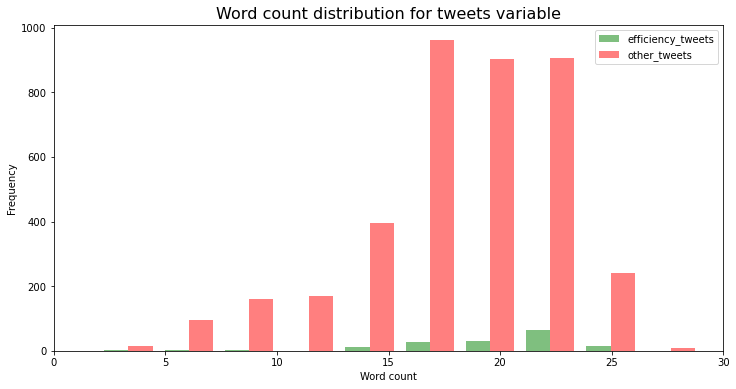

In [15]:
# plot word count distribution for both positive and negative 

df['word count'] = df['tweet'].apply(word_count)
p = df['word count'][df.Label == 1]
n = df['word count'][df.Label == 0]
plt.figure(figsize=(12,6))
plt.xlim(0,30)
plt.xlabel('Word count')
plt.ylabel('Frequency')
g = plt.hist([p, n], color=['g','r'], alpha=0.5, label=['efficiency_tweets','other_tweets'])
plt.title('Word count distribution for tweets variable',fontsize=16)
plt.savefig("Word count distribution for tweets variable.png")
plt.legend(loc='upper right')

In [16]:

from collections import Counter
all_words = []
for line in list(df['tweet']):
    words = line.split()
    for word in words:
      if(len(word)>2):
        all_words.append(word.lower())
    
    
Counter(all_words).most_common(20)

[('the', 2474),
 ('#covidvaccine', 1803),
 ('and', 1044),
 ('for', 856),
 ('vaccine', 587),
 ('get', 501),
 ('this', 501),
 ('you', 481),
 ("'covidvaccine']", 458),
 ('are', 432),
 ('that', 356),
 ('have', 338),
 ('#covid19', 338),
 ('with', 336),
 ('&amp;', 294),
 ('dose', 275),
 ('got', 262),
 ('first', 242),
 ('our', 240),
 ('covid', 236)]

In [17]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
print(stopword)

{"weren't", 're', 'each', 'while', "doesn't", 'mustn', 'we', "don't", 'so', 'a', 'him', 'the', 'by', 'it', 'these', 'theirs', 'why', 'has', 'about', 'mightn', 'didn', 'once', 'o', 'can', 'at', 'its', 'until', 'from', 'only', 'through', 'isn', 'wouldn', 'under', "couldn't", 'he', 'just', 'who', 'how', 'should', 'before', 'into', 'to', 'd', "shouldn't", 'hadn', "wouldn't", 'ours', 'won', 'm', 'very', 'his', 'y', 'no', 'doesn', 'haven', 'yourself', "that'll", 'herself', 'other', 'for', 'further', 'shan', 'wasn', 'such', 'with', 'against', 'up', 'there', 'hers', 'when', "shan't", 'hasn', 've', 'few', "won't", 'be', 'as', "should've", 'themselves', 'am', 'll', 'on', 'yourselves', 't', 'that', "mightn't", 'or', 'our', 'whom', 'weren', 'over', 'did', 'what', 'any', 'my', 'being', "she's", 'here', "mustn't", 'then', 'an', 'me', 'was', 'above', 'which', 'both', 'now', "it's", "needn't", 'during', 'do', 'ourselves', 'shouldn', 'having', 'most', 'your', 'she', 'you', 'they', "wasn't", 'after', 't

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\VIOLIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\VIOLIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VIOLIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'
def process_tweets(tweet):
  # Lower Casing
    tweet = tweet.lower()
    tweet=tweet[1:]
    # Removing all URls 
    tweet = re.sub(urlPattern,'',tweet)
    # Removing all @username.
    tweet = re.sub(userPattern,'', tweet) 
    #Remove punctuations
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    #tokenizing words
    tokens = word_tokenize(tweet)
    #Removing Stop Words
    final_tokens = [w for w in tokens if w not in stopword]
    #reducing a word to its word stem 
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        finalwords.append(word)
    return ' '.join(finalwords)

In [19]:
df['processed_tweets'] = df['tweet'].apply(lambda x: process_tweets(x))
print('Text Preprocessing complete.')

Text Preprocessing complete.


In [20]:
## Other tweets

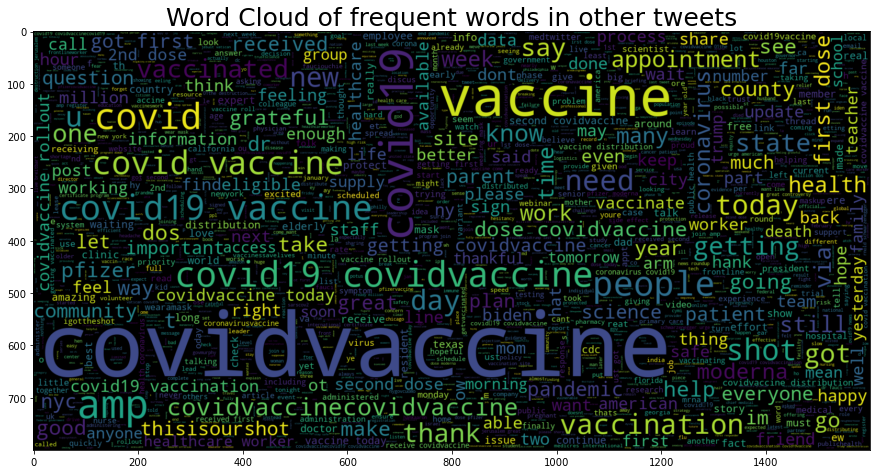

In [21]:
plt.figure(figsize = (15,15)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.Label == 0].processed_tweets))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word Cloud of frequent words in other tweets',fontsize=25)
plt.savefig("Word cloud 0.png")

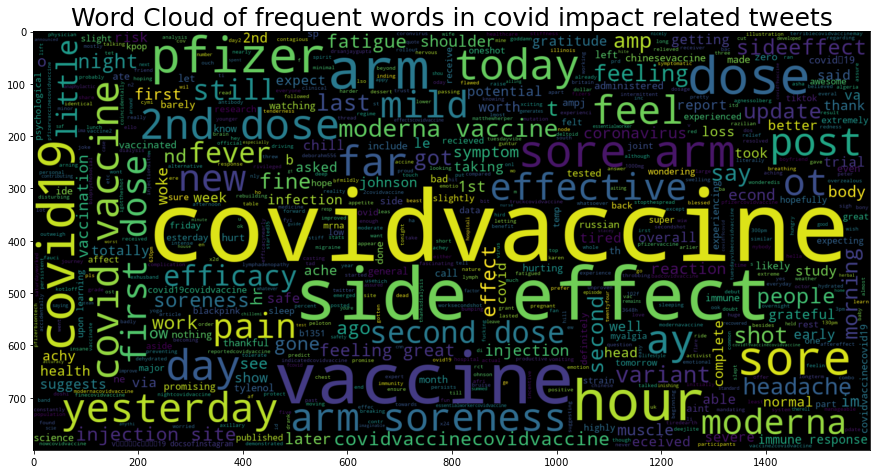

In [22]:
plt.figure(figsize = (15,15)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.Label == 1].processed_tweets))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word Cloud of frequent words in covid impact related tweets',fontsize=25)
plt.savefig("Word cloud 1.png")

In [23]:
#  creating feature array & target array
X = df['tweet']
y = df['Label']

In [24]:
# review of target array
df.groupby(by='Label').agg('count')

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,date,source,tweet,length,word count,processed_tweets
Label,,,,,,,,,,,,,
0.0,3850,3850,3850,3850,3850,3850,3850,3850,3850,3850,3850,3850,3850
1.0,149,149,149,149,149,149,149,149,149,149,149,149,149


In [25]:
## text pre processing

In [26]:

# convert text to dtm with tfidf weighting

vect1 = TfidfVectorizer(stop_words='english', min_df=5,token_pattern=u'\\b[^\\d\\W]+\\b')
#vect = TfidfVectorizer(stop_words='english', min_df=20)


## creating Document Term matrix
dtm1 = vect1.fit_transform(df['tweet'])
dtm1.shape

(3999, 1294)

In [27]:
## checking feature names
vect1.get_feature_names()

['_dchealth',
 'able',
 'absolutely',
 'access',
 'accessible',
 'according',
 'aches',
 'acog',
 'act',
 'action',
 'actually',
 'add',
 'address',
 'addressing',
 'admin',
 'administer',
 'administered',
 'administering',
 'administration',
 'adults',
 'affect',
 'affected',
 'africa',
 'african',
 'age',
 'aged',
 'ago',
 'agree',
 'ahead',
 'airlines',
 'alamedacounty',
 'ali',
 'allergies',
 'allison',
 'allowed',
 'allowing',
 'amazing',
 'amazon',
 'america',
 'american',
 'americans',
 'amp',
 'analysis',
 'angeles',
 'announced',
 'announces',
 'answer',
 'answered',
 'answers',
 'anti',
 'antibodies',
 'antivaxxers',
 'anxiety',
 'ap',
 'apoorva_nyc',
 'app',
 'apparently',
 'appointment',
 'appointments',
 'approved',
 'appt',
 'appts',
 'ar',
 'area',
 'aren',
 'arizona',
 'arm',
 'arms',
 'arnold',
 'art',
 'article',
 'asap',
 'ask',
 'asked',
 'asking',
 'atriumhealth',
 'atx',
 'auspublichealth',
 'austin',
 'autoimmune',
 'available',
 'awaiting',
 'away',
 'awesome',


In [28]:
# convert vocabulary to dictionary of term indices
vect1.vocabulary_
term_indices = {index: term for term, index in vect1.vocabulary_.items()}
#term_indices

term_indices

{117: 'breakingnews',
 116: 'breaking',
 242: 'delays',
 1058: 'start',
 990: 'season',
 375: 'feb',
 964: 's',
 1267: 'word',
 531: 'https',
 1090: 't',
 737: 'new',
 1088: 'survey',
 1169: 'u',
 492: 'healthcare',
 1272: 'workers',
 767: 'offered',
 213: 'covidvaccine',
 920: 'refuse',
 500: 'help',
 1051: 'spread',
 1136: 'tip',
 853: 'president',
 145: 'ceo',
 33: 'allison',
 1259: 'winnike',
 1286: 'year',
 776: 'old',
 715: 'mother',
 124: 'brown',
 1140: 'told',
 433: 'getting',
 809: 'people',
 207: 'country',
 478: 'hands',
 202: 'coronavirus',
 1198: 'vaccine',
 286: 'drive',
 1183: 'usa',
 1171: 'uk',
 1240: 'wearamask',
 547: 'important',
 635: 'lives',
 1010: 'short',
 451: 'government',
 155: 'chicago',
 508: 'hhsgov',
 44: 'announced',
 1245: 'week',
 926: 'release',
 942: 'reserve',
 1014: 'shots',
 889: 'publix',
 819: 'pharmacies',
 422: 'ga',
 766: 'offer',
 211: 'covid',
 1197: 'vaccinations',
 1196: 'vaccination',
 1194: 'vaccinated',
 265: 'disneyland',
 1165: 'tw

In [29]:
# create a list of column names from the term indices
colterms = [term_indices[i] for i in range(dtm1.shape[1])]

In [30]:
# feature matrix
X = pd.DataFrame(dtm1.toarray(), columns=colterms)
#output
X.head()

,_dchealth,able,absolutely,access,accessible,according,aches,acog,act,action,...,y,yay,year,years,yes,yesterday,yo,york,yorkers,youtube
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.337975,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
## Splitting the data intro training & test data

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size = .20,random_state=123)

## validation curve - KNN

In [32]:
# model fitting - KNN
knn1 = KNN()
knn1.fit(X, y)

KNeighborsClassifier()

In [33]:
##checking the  paramaters
knn1.get_params() 

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [35]:
## scores
#k_range = np.arange(1,5)
#depth_range = np.arange(1,10)



#train_scores1, test_scores1 = validation_curve(knn1, X, y, param_name='p',
                                           # param_range=k_range, cv=5)
#train_scores1

In [36]:
#train_mean1 = np.mean(train_scores1, axis=1)
#test_mean1 = np.mean(test_scores1, axis=1)
#test_mean1

In [37]:
##converting the 2*5 matrix into 1*10 matrix
#train_mean1 = train_mean1.flatten()
#test_mean1 = test_mean1.flatten()

In [38]:
#pos_class = [1,2,3,4,5,6,7,8,9,10]
#fig1 = plt.figure()
#plt.plot(pos_class, train_mean1, label='Train')
#plt.plot(pos_class, test_mean1, label='Test')
#plt.xlabel('Positive Class Probability')
#plt.ylabel('Score')
#plt.title('KNN Validation Curve')
#plt.legend()
#plt.show()
#fig1.savefig('knn validation_curve.png')

In [39]:
# Fit d k- nearestneighbours for training data
knn = KNN()
knn.fit(Xtrain, ytrain)
# model validation
cross_val_score(knn1, Xtrain, ytrain, cv=5)

array([0.9671875 , 0.9640625 , 0.9640625 , 0.965625  , 0.95774648])

In [40]:
# Accuracy score of test data for KNN - mean test accuracy
knn.score(Xtest, ytest)

0.97

## validation curve - mnb

In [41]:
# Fit decision tree model for all data
mnb1 = MultinomialNB(alpha=1)
mnb1.fit(X, y)

MultinomialNB(alpha=1)

In [42]:
# model validation
cross_val_score(mnb1, X, y, cv=5)

array([0.9625    , 0.96375   , 0.9625    , 0.96375   , 0.96370463])

In [43]:
# Accuracy score
mnb1.score(X, y)

0.964991247811953

In [44]:
# range of priors
prior_set1 = np.arange(1,11)
print(prior_set1)

[ 1  2  3  4  5  6  7  8  9 10]


In [45]:
##checking the tree paramaters
mnb1.get_params()

{'alpha': 1, 'class_prior': None, 'fit_prior': True}

In [50]:
#depth_range = np.arange(1,10)
train_scores2, test_scores2 = validation_curve(mnb1, X, y, param_name='alpha',
                                            param_range=prior_set1, cv=5)
train_scores2

array([[0.96342607, 0.96467646, 0.96467646, 0.96436386, 0.9646875 ],
       [0.96280088, 0.96311347, 0.96280088, 0.96280088, 0.9628125 ],
       [0.96280088, 0.96280088, 0.96280088, 0.96280088, 0.9625    ],
       [0.96280088, 0.96280088, 0.96280088, 0.96280088, 0.9625    ],
       [0.96280088, 0.96280088, 0.96280088, 0.96280088, 0.9625    ],
       [0.96280088, 0.96280088, 0.96280088, 0.96280088, 0.9625    ],
       [0.96280088, 0.96280088, 0.96280088, 0.96280088, 0.9625    ],
       [0.96280088, 0.96280088, 0.96280088, 0.96280088, 0.9625    ],
       [0.96280088, 0.96280088, 0.96280088, 0.96280088, 0.9625    ],
       [0.96280088, 0.96280088, 0.96280088, 0.96280088, 0.9625    ]])

In [51]:
train_mean2 = np.mean(train_scores2, axis=1)
test_mean2 = np.mean(test_scores2, axis=1)
test_mean2

array([0.96324093, 0.96274093, 0.96274093, 0.96274093, 0.96274093,
       0.96274093, 0.96274093, 0.96274093, 0.96274093, 0.96274093])

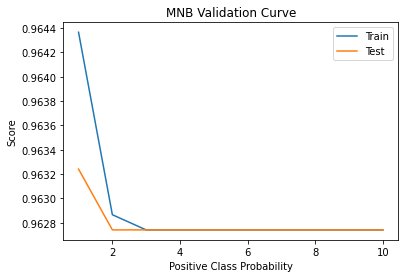

In [52]:
pos_class = [1,2,3,4,5,6,7,8,9,10]
fig1 = plt.figure()
plt.plot(pos_class, train_mean2, label='Train')
plt.plot(pos_class, test_mean2, label='Test')
plt.xlabel('Positive Class Probability')
plt.ylabel('Score')
plt.title('MNB Validation Curve')
plt.legend()
plt.show()
fig1.savefig('validation_curve.png')

In [53]:
# Fit MultinomialNB for training data
mnb = MultinomialNB(alpha=1)
mnb.fit(Xtrain, ytrain)
cross_val_score(mnb, X, y, cv=5)

array([0.9625    , 0.96375   , 0.9625    , 0.96375   , 0.96370463])

In [54]:
# Accuracy score of test data for MNB - mean test accuracy
mnb.score(Xtest, ytest)

0.96875

In [55]:
## Validation curve decision tree

In [56]:
# Fit decision tree model for all data
tree = DecisionTreeClassifier()
tree.fit(X, y)

DecisionTreeClassifier()

In [57]:
# model validation
cross_val_score(tree, X, y, cv=5)

array([0.97      , 0.96      , 0.955     , 0.96375   , 0.95619524])

In [58]:
# Accuracy score
tree.score(X, y)

0.9997499374843711

In [59]:
# range of priors
prior_set = np.arange(1,11)
print(prior_set)

[ 1  2  3  4  5  6  7  8  9 10]


In [60]:
##checking the tree paramaters
tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [61]:
#depth_range = np.arange(1,10)
train_scores, test_scores = validation_curve(tree, X, y, param_name='max_depth',
                                            param_range=prior_set, cv=5)
train_scores

array([[0.96967802, 0.96967802, 0.97030322, 0.96936543, 0.9675    ],
       [0.97124101, 0.97655517, 0.97124101, 0.97467959, 0.9734375 ],
       [0.97499219, 0.97905595, 0.97530478, 0.97749297, 0.9775    ],
       [0.97749297, 0.98124414, 0.97686777, 0.97905595, 0.98      ],
       [0.98093154, 0.98155674, 0.98030635, 0.97936855, 0.981875  ],
       [0.98562051, 0.98343232, 0.98343232, 0.98218193, 0.984375  ],
       [0.98843389, 0.9865583 , 0.98562051, 0.98405752, 0.9865625 ],
       [0.98968428, 0.98843389, 0.98780869, 0.98718349, 0.9884375 ],
       [0.99187246, 0.98968428, 0.98874648, 0.98843389, 0.9890625 ],
       [0.99281025, 0.99030947, 0.98999687, 0.99062207, 0.9903125 ]])

In [62]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_mean

array([0.96299124, 0.97049312, 0.97299343, 0.97024186, 0.96924155,
       0.96924155, 0.96749061, 0.96924093, 0.9654903 , 0.96774093])

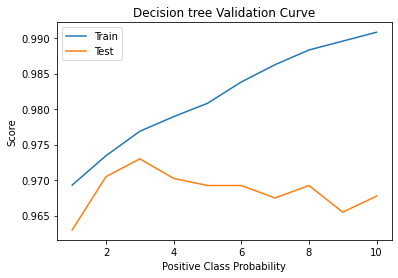

In [63]:
pos_class = [1,2,3,4,5,6,7,8,9,10]
fig1 = plt.figure()
plt.plot(pos_class, train_mean, label='Train')
plt.plot(pos_class, test_mean, label='Test')
plt.xlabel('Positive Class Probability')
plt.ylabel('Score')
plt.title('Decision tree Validation Curve')
plt.legend()
plt.show()
fig1.savefig('validation_curve.png')

In [64]:
# Fit decision tree model for training data
tree1 = DecisionTreeClassifier(max_depth=3)
tree1.fit(Xtrain, ytrain)

DecisionTreeClassifier(max_depth=3)

In [65]:
# model validation
cross_val_score(tree1, Xtrain, ytrain, cv=5)

array([0.978125  , 0.965625  , 0.965625  , 0.965625  , 0.97026604])

In [66]:
# Accuracy score of test data
tree1.score(Xtest, ytest)

0.9775

### confusion matrix

In [69]:
import seaborn as sns

Confusion Matrix KNN : 
 [[768   7]
 [ 17   8]] 



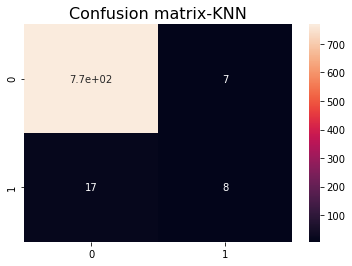

In [70]:

#create array of probabilities
y_test_predict_proba = knn.predict_proba(Xtest)

# calc confusion matrix for test data
y_test_predict = knn.predict(Xtest)
print("Confusion Matrix KNN : \n", confusion_matrix(ytest, y_test_predict),"\n")

cf_knn = confusion_matrix(ytest, y_test_predict)


sns.heatmap(cf_knn, annot=True)
plt.title('Confusion matrix-KNN',fontsize=16)
plt.savefig("Confusion matrix-KNN.png")

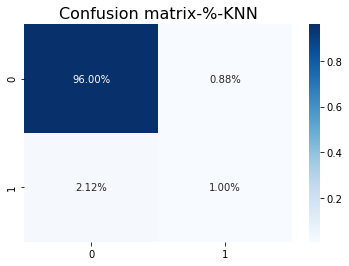

In [71]:
sns.heatmap(cf_knn/np.sum(cf_knn), annot=True, 
            fmt='.2%', cmap='Blues')
plt.title('Confusion matrix-%-KNN',fontsize=16)
plt.savefig("Confusion matrix-%-KNN.png")

Confusion Matrix MNB : 
 [[775   0]
 [ 25   0]] 



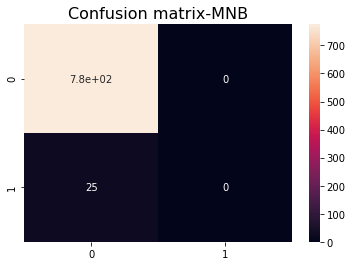

In [72]:
#create array of probabilities
y_test_predict_proba = mnb.predict_proba(Xtest)

# calc confusion matrix for test data
y_test_predict = mnb.predict(Xtest)
print("Confusion Matrix MNB : \n", confusion_matrix(ytest, y_test_predict),"\n")

cf_mnb = confusion_matrix(ytest, y_test_predict)


sns.heatmap(cf_mnb, annot=True)
plt.title('Confusion matrix-MNB',fontsize=16)
plt.savefig("Confusion matrix-MNB.png")

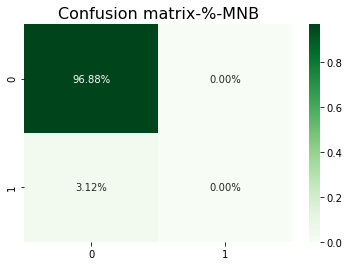

In [73]:
sns.heatmap(cf_mnb/np.sum(cf_mnb), annot=True, 
            fmt='.2%', cmap='Greens')
plt.title('Confusion matrix-%-MNB',fontsize=16)
plt.savefig("Confusion matrix-%-MNB.png")


Confusion Matrix Tree : 
 [[770   5]
 [ 13  12]] 



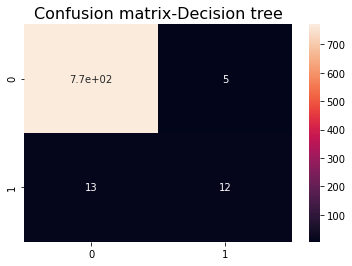

In [74]:


#create array of probabilities
y_test_predict_proba = tree1.predict_proba(Xtest)

# calc confusion matrix for test data
y_test_predict = tree1.predict(Xtest)
print("Confusion Matrix Tree : \n", confusion_matrix(ytest, y_test_predict),"\n")

cf_tree1 = confusion_matrix(ytest, y_test_predict)


sns.heatmap(cf_tree1, annot=True)
plt.title('Confusion matrix-Decision tree',fontsize=16)
plt.savefig("Confusion matrix-Decision tree.png")

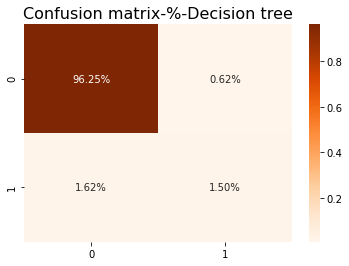

In [75]:
sns.heatmap(cf_tree1/np.sum(cf_tree1), annot=True, 
            fmt='.2%', cmap='Oranges')
plt.title('Confusion matrix-%-Decision tree',fontsize=16)
plt.savefig("Confusion matrix-%-Decision tree.png")


In [76]:
dot_data = export_graphviz(tree1,  
                  filled=True, rounded=True,  
                  special_characters=True,
                   out_file=None,
                           )
graph = graphviz.Source(dot_data)
graph
graph.format = "png"
graph.render("decision tree")

'decision tree.png'

### ROC curves

In [77]:
# extract information to plot ROC curves for multiple models
def get_curve_data(ytrue, yprobs, pos_class_label):
    '''Computes data needed to plot an ROC or precision-recall curve
       Accepts arrays of true values, predicted probabilities, and class label
       Returns a dictionary of arrays for precision, recall, FPR, and TPR scores'''
    precision, recall, thresholds = precision_recall_curve(ytrue, yprobs, pos_label=pos_class_label)
    FPR, TPR, thresholds = roc_curve(ytrue, yprobs, pos_label=pos_class_label)
    rates = pd.DataFrame(dict(fpr=FPR, tpr=TPR))
    return {'precision': precision, 'recall': recall, 'rates': rates}

In [78]:

##calculating probabilities
probabilities = {'K Nearest Neighbours': knn.fit(Xtrain, ytrain).predict_proba(Xtest),'Multinomial Naive Bayes': mnb.fit(Xtrain, ytrain).predict_proba(Xtest),'Decision tree': tree1.fit(Xtrain, ytrain).predict_proba(Xtest) 
                 }
knn_data = get_curve_data(ytest, probabilities['K Nearest Neighbours'][:,1], 1)
mnb_data = get_curve_data(ytest, probabilities['Multinomial Naive Bayes'][:,1], 1)
tree_data = get_curve_data(ytest, probabilities['Decision tree'][:,1], 1)



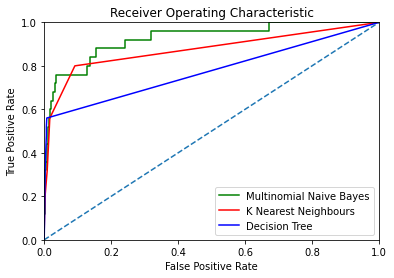

In [79]:
## plotting ROC
fig_roc = plt.figure()

plt.plot(mnb_data['rates'].fpr, mnb_data['rates'].tpr, 'green', label='Multinomial Naive Bayes')
plt.plot(knn_data['rates'].fpr, knn_data['rates'].tpr, 'red', label='K Nearest Neighbours')
plt.plot(tree_data['rates'].fpr, tree_data['rates'].tpr, 'Blue', label='Decision Tree')


plt.plot([0, 1], [0, 1],'--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.savefig("ROC.png")
plt.show()